# Jaklyn Soler

# Module 4 Project

# Strategic Summary

### Objective

It is April 2018 and I have been tasked with recommending 5 top zip codes to a real estate investment company. My responsibilities include analyzing risk, profit, and exploring other concepts independently. 

### Strategic Data Selection

In order to select the area, I defined the best strategy as long term property rentals. I defined the best area as the northeast due to the low rental vacancy rate. One common strategy real estate investors employ is seeking out probate properties and due to the high amount of baby boomers in New York, it is likely that there will be a high number of properties in the probate system over the next 20 years. Therefore, New York was selected as the best state for investments. An assumption that the real estate investment company has a large amount of capital was assumed in order to select the parameters of price for the properties. Properties between 500000 dollars and 700000 dollars were selected as they will have a high amount of value which means high rental prices and simletaneously allow the investor to have multiple properties so that having a problem with one tenant wont put a halt on cash flow. 

### Return on Investment 

After these decisions were made, I analysed percentage of roi on value of the home. Average monthly rental amount falls between .8% and 1.1% of the property value. By having a more competitive rental price, property owners can be more selective in their tenant evaluation since it will attract more interested renters. In light of this strategy, I selected the monthly rental amount of .9% meaning that in a 12 month period, the tenant would pay 10.8% of the property value. Not accounting for property maintenance and vacancy, every property would pay for its initial amount in 9 years and four months.

### Layout
 - PART ONE: Introduction & Zipcode Analysis
 - PART TWO: Zipcode Analysis
 - PART THREE: Zipcode Analysis
 - PART FOUR: Final Analysis & Conclusion

# Loading Zillow Data

### Relevant packages can be imported.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import xlrd
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest
from sklearn.metrics import r2_score
from pmdarima.arima import ndiffs
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot, lag_plot
import warnings
warnings.filterwarnings('ignore')
import itertools
import statsmodels.api as sm
from matplotlib.pylab import rcParams
plt.style.use('ggplot')
from statsmodels.tsa.stattools import adfuller

### ACF & PACF Function

In [2]:
def plot_acf_pacf(ts, figsize=(10,8), lags = 24, zipcode = 'add'):
    
    fig,ax = plt.subplots(nrows=3,
                         figsize = figsize)
    
    #plot time series
    ts.plot(ax=ax[0])
    
    #plot acf, pacf
    plot_acf(ts,ax=ax[1], lags=lags)
    plot_pacf(ts, ax=ax[2], lags=lags)
    fig.tight_layout()
    
    fig.suptitle(f'Zipcode: {zipcode}',y=1.1, fontsize=20)
    
    for a in ax[1:]:
        a.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(min_n_ticks=lags, integer = True))
        a.xaxis.grid()
    return fig,ax


### Truncating can be removed for better analysis. 

In [3]:
pd.set_option('display.max_columns', None) #prevents trailing elipses
pd.set_option('display.max_rows', None)

# Unpickling queens_grouped & results Dataframes

In [4]:
queens_grouped = pd.read_pickle("./queens_grouped.pkl")

In [5]:
results = pd.read_pickle("./results.pkl")

# 11418

In [11]:
four_one_eight = queens_grouped.loc[11418]

In [12]:
four_one_eight.tail()

,value
time,
2017-12-31,602000.0
2018-01-31,602600.0
2018-02-28,603800.0
2018-03-31,607600.0
2018-04-30,611500.0


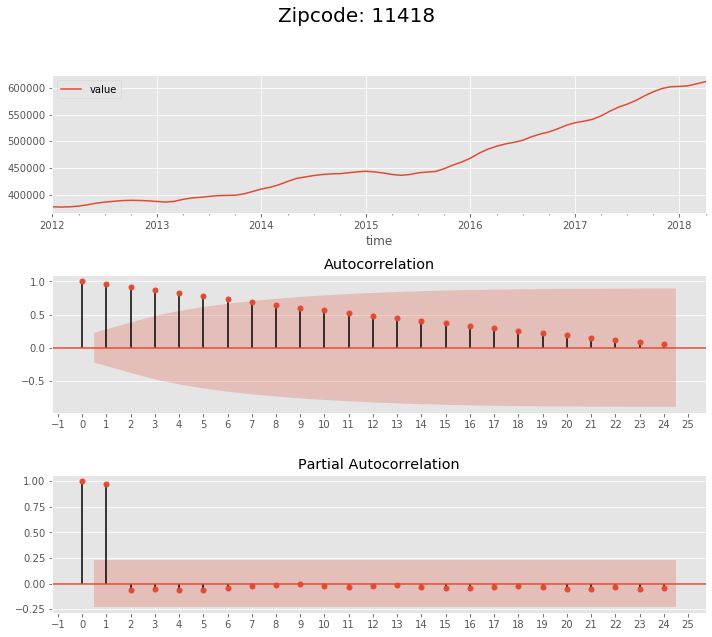

In [13]:
plot_acf_pacf(four_one_eight, zipcode = '11418')
plt.show()

### Decompose Time Series

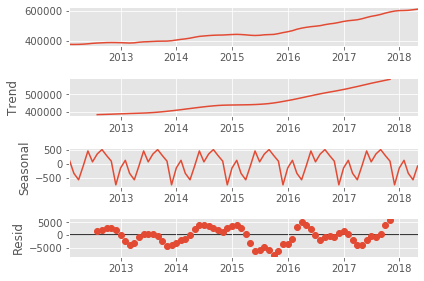

In [14]:
decompose_result = seasonal_decompose(four_one_eight, model="additive")

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

decompose_result.plot();

### Fixing Trend: Moving Window Function

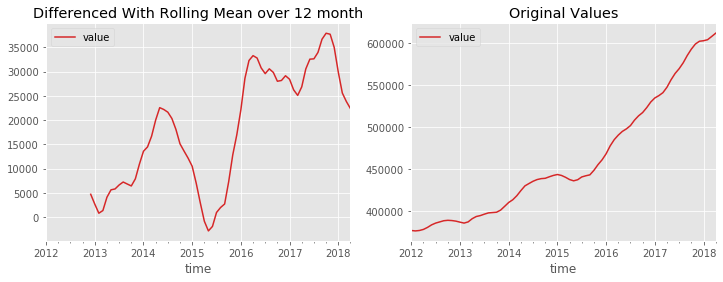

In [15]:
rolling_mean = four_one_eight.rolling(window = 12).mean()
four_one_eight_rolled_detrended = four_one_eight - rolling_mean

ax1 = plt.subplot(121)
four_one_eight_rolled_detrended.plot(figsize=(12,4),color="tab:red", title="Differenced With Rolling Mean over 12 month", ax=ax1);
ax2 = plt.subplot(122)
four_one_eight.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

### Testing with the Dicky-Fuller Test

In [16]:
dftest = adfuller(four_one_eight_rolled_detrended.dropna(), autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -1.2836370317901402
2. P-Value :  0.6366247487437977
3. Num Of Lags :  9
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 55
5. Critical Values :
	 1% :  -3.5552728880540942
	 5% :  -2.9157312396694217
	 10% :  -2.5956695041322315


### Using Differencing with Mean Rolled Time Series for Seasonality

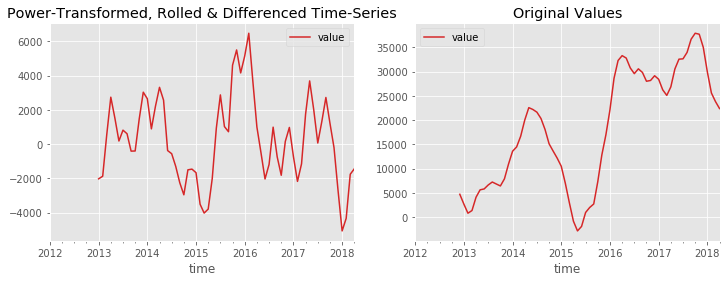

In [17]:
four_one_eight_rolled_detrended_diff = four_one_eight_rolled_detrended - four_one_eight_rolled_detrended.shift()

ax1 = plt.subplot(121)
four_one_eight_rolled_detrended_diff.plot(figsize=(8,4), color="tab:red", title="Power-Transformed, Rolled & Differenced Time-Series", ax=ax1);
ax2 = plt.subplot(122)
four_one_eight_rolled_detrended.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

### Retesting with the Dicky-Fuller Test

In [18]:
dftest = adfuller(four_one_eight_rolled_detrended_diff.dropna().values, autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -3.637037316183663
2. P-Value :  0.005091177691274142
3. Num Of Lags :  8
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 55
5. Critical Values :
	 1% :  -3.5552728880540942
	 5% :  -2.9157312396694217
	 10% :  -2.5956695041322315


In [19]:
four_one_eight = four_one_eight_rolled_detrended_diff

### SARIMAX Modeling: Parameter Selection

In [20]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [21]:
# Run a grid with pdq and seasonal pdq parameters 
#calculated above and get the best (lowest) AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(four_one_eight,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            #print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

### Fitting the Time Series Model - SARIMAX

In [22]:
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])

In [23]:
best_params = dict(ans_df.loc[ans_df['aic'].idxmin()])
best_params

{'pdq': (2, 2, 2), 'pdqs': (0, 2, 2, 12), 'aic': 425.13043389895006}

In [24]:
best_params['pdq']

(2, 2, 2)

In [25]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(four_one_eight, 
                                        order= best_params['pdq'], 
                                        seasonal_order=best_params['pdqs'], 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

output.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              value   No. Observations:                   76
Model:             SARIMAX(2, 2, 2)x(0, 2, 2, 12)   Log Likelihood                -205.565
Date:                            Mon, 21 Dec 2020   AIC                            425.130
Time:                                    20:42:10   BIC                            433.079
Sample:                                01-31-2012   HQIC                           427.129
                                     - 04-30-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1441      0.365      0.395      0.693      -0.572       0.860
ar.L2         -0.5202      0.400     -1.301      0.193      -1.304       0.264
ma.L1         -0.4349      1.372     -0.317      0.751      -3.124       2.254
ma.L2         -0.5653      0.932     -0.607      0.544      -2.392       1.261
ma.S.L12      -2.4251      1.088     -2.230      0.026      -4.557      -0.293
ma.S.L24       1.6436      2.040      0.806      0.420      -2.355       5.642
sigma2      1.175e+06   1.37e-06   8.59e+11      0.000    1.17e+06    1.17e+06
===================================================================================
Ljung-Box (Q):                       16.95   Jarque-Bera (JB):                 0.49
Prob(Q):                              0.77   Prob(JB):                         0.78
Heteroskedasticity (H):               0.96   Skew:                            -0.15
Prob(H) (two-sided):                  0.96   Kurtosis:                         2.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.54e+29. Standard errors may be unstable.
"""

### Plot Diagnostics

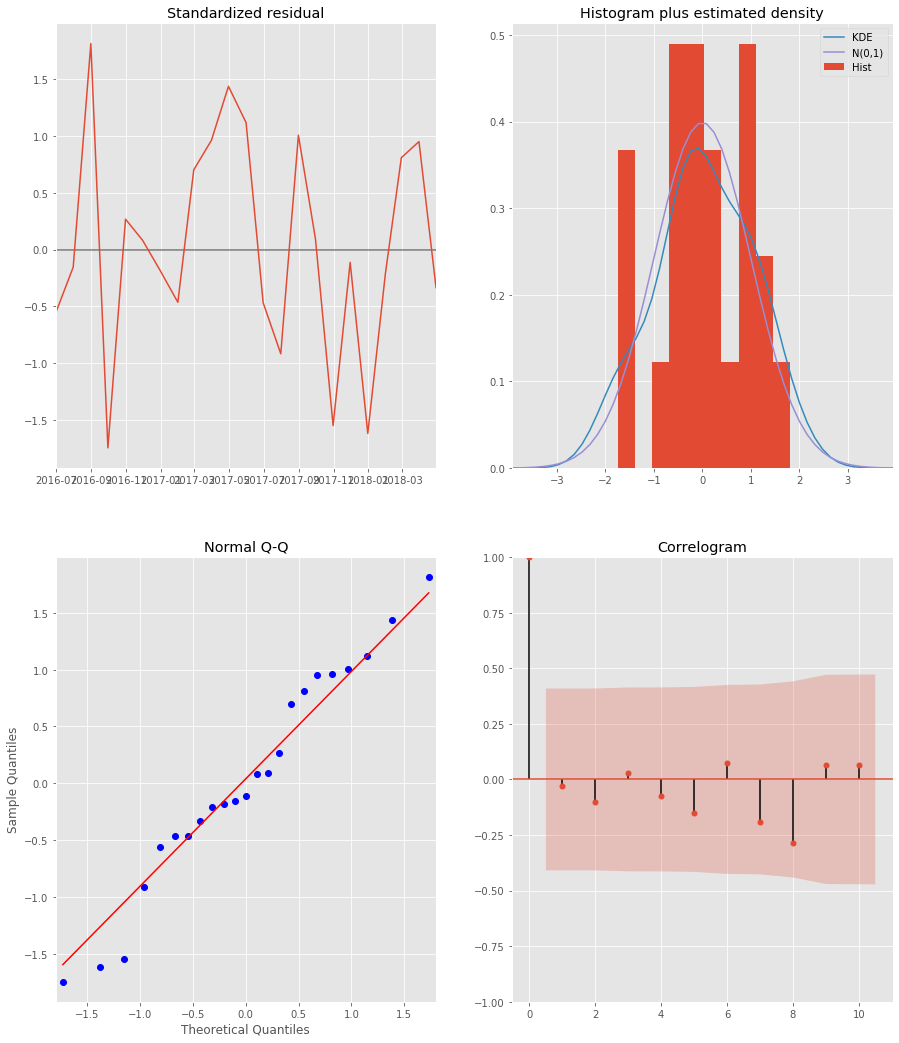

In [26]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

### Model Validation - One Step Ahead Forecasting:

The data can be split 80% and 20% by indicing at 2017-01-31.

In [27]:
four_one_eight[60:]

,value
time,
2017-01-31,-725.000000
2017-02-28,-2175.000000
2017-03-31,-1150.000000
2017-04-30,1758.333333
2017-05-31,3691.666667
2017-06-30,2016.666667
2017-07-31,66.666667
2017-08-31,1325.000000
2017-09-30,2725.000000


In [28]:
pred = output.get_prediction(start=pd.to_datetime('2017-01-31'), dynamic=False)
pred_conf = pred.conf_int()

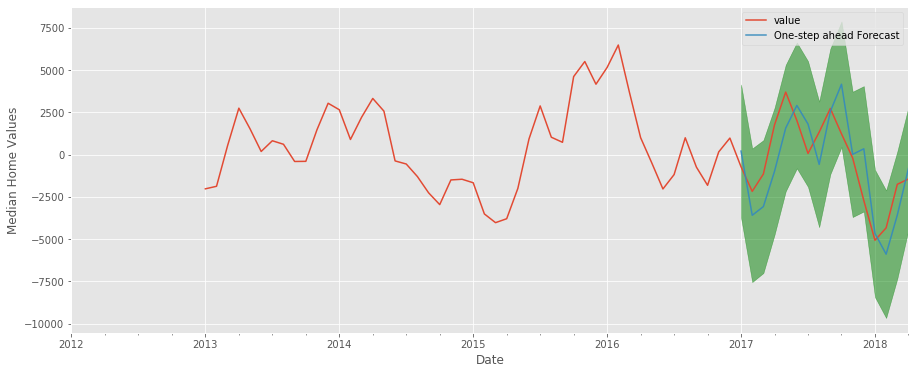

In [29]:

rcParams['figure.figsize'] = 15, 6

ax = four_one_eight['2012':].plot(label='observed')

pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

ax.set_xlabel('Date')
ax.set_ylabel('Median Home Values')
plt.legend()

plt.show()

### Accuracy Validation with MSE (Mean Squared Error)

In [30]:
val_forecasted = pred.predicted_mean
val_truth = four_one_eight.loc['2017-01-31':].value

mse = ((val_forecasted - val_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 3149082.19


### Model Validation - Dynamic Forecasting

In [31]:
pred_dynamic = output.get_prediction(start=pd.to_datetime('2017-01-31'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()


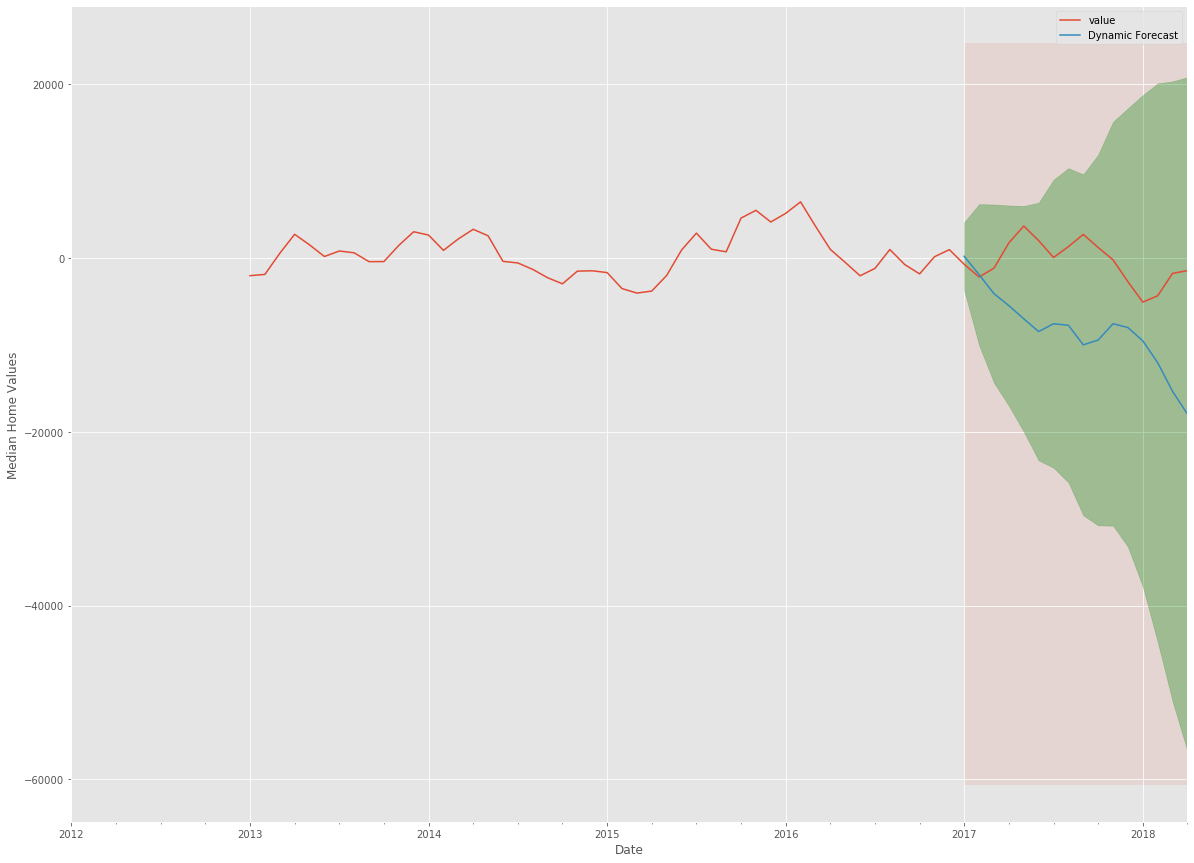

In [32]:
ax = four_one_eight['2012':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2017-01-31'), val_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Median Home Values')

plt.legend()
plt.show()


In [33]:
val_forecasted = pred_dynamic.predicted_mean
val_truth = four_one_eight.loc['2017-01-31':].value

mse = ((val_forecasted - val_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 82448253.32


### Visualizing Confidence Interval

In [34]:
# Get forecast 24 steps ahead in future
prediction = output.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

pred_conf['mean'] = prediction.predicted_mean

pred_conf.head()

,lower value,upper value,mean
2018-05-31,-6982.097399,254.350150,-3363.873625
2018-06-30,-12228.239966,2484.868088,-4871.685939
2018-07-31,-13052.738119,5256.660992,-3898.038563
2018-08-31,-13287.878573,6931.241492,-3178.318541
2018-09-30,-16090.822663,6435.307528,-4827.757567


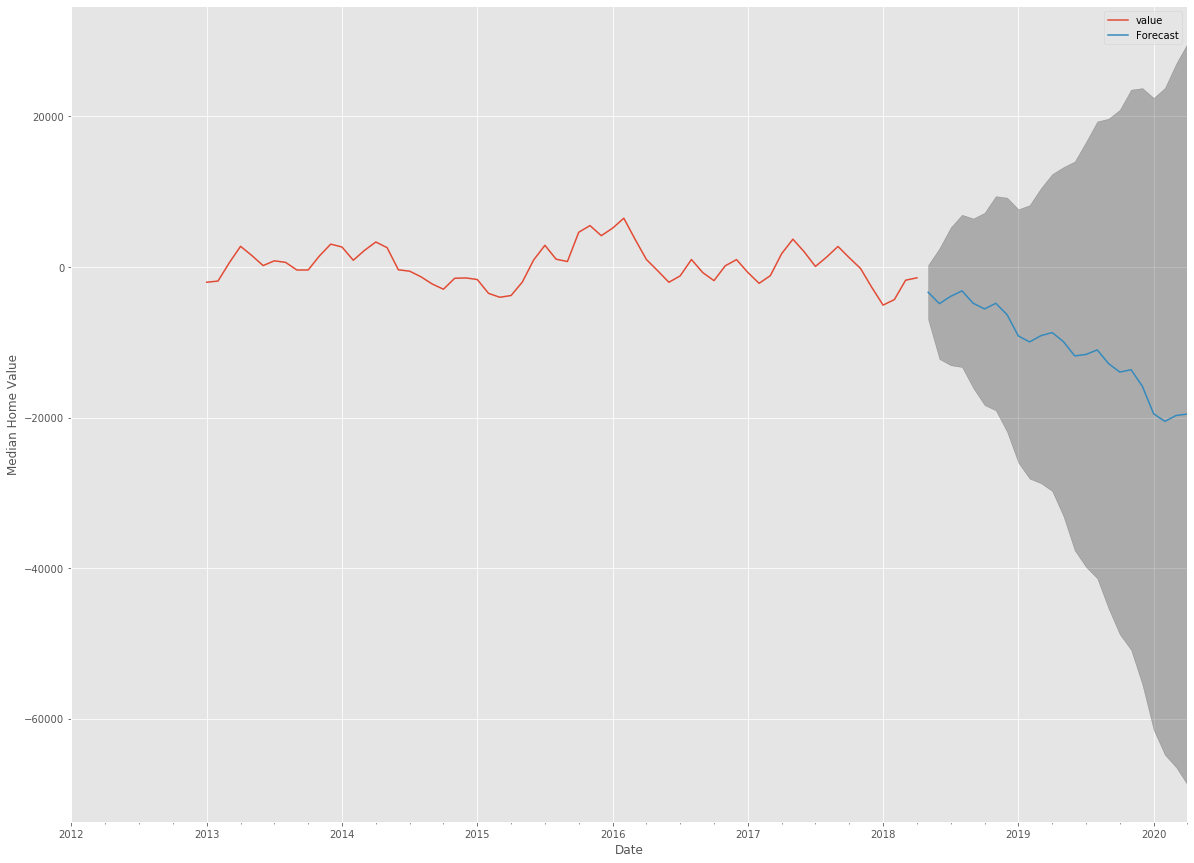

In [35]:
ax = four_one_eight.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Median Home Value')

plt.legend()
plt.show()

# Average Return on Investment (ROI) Percentage

The earliest predicted mean represents the value or possible cost of the property at the beginning of the real estate investing initiative. We calculate the percentage of return by subtracting cost from the average predicted values and dividing by the cost. Holding on to a percentage allows for comparison between other zipcodes.

In [36]:
cost = pred_conf.iloc[0]['mean']
roi = (pred_conf - cost)/ cost * 100

roi


,lower value,upper value,mean
2018-05-31,107.561228,-107.561228,-0.000000
2018-06-30,263.516628,-173.869246,44.823691
2018-07-31,288.027006,-256.268088,15.879459
2018-08-31,295.017175,-306.049402,-5.516113
2018-09-30,378.342068,-291.306459,43.517804
2018-10-31,445.161147,-313.934737,65.613205
2018-11-30,466.493374,-379.561651,43.465861
2018-12-31,550.855118,-373.724559,88.565279
2019-01-31,672.842353,-327.813649,172.514352
2019-02-28,735.891572,-343.929525,195.981023


# Results Dataframe

In [39]:
results.AIC[4] = 425.13
results.Investment_Required[4] = 611500
results.ROI_Percentage[4] = 481.04
results.head()

,Zipcode,AIC,Investment_Required,ROI_Percentage
0,11385,419,657500,211
1,11414,431,669800,24
2,11378,415,696100,-25
3,11421,431,547100,24
4,11418,425,611500,481


# 11423

In [40]:
four_two_three = queens_grouped.loc[11423]

In [41]:
four_two_three.tail()

,value
time,
2017-12-31,522100.0
2018-01-31,523600.0
2018-02-28,526300.0
2018-03-31,529800.0
2018-04-30,533400.0


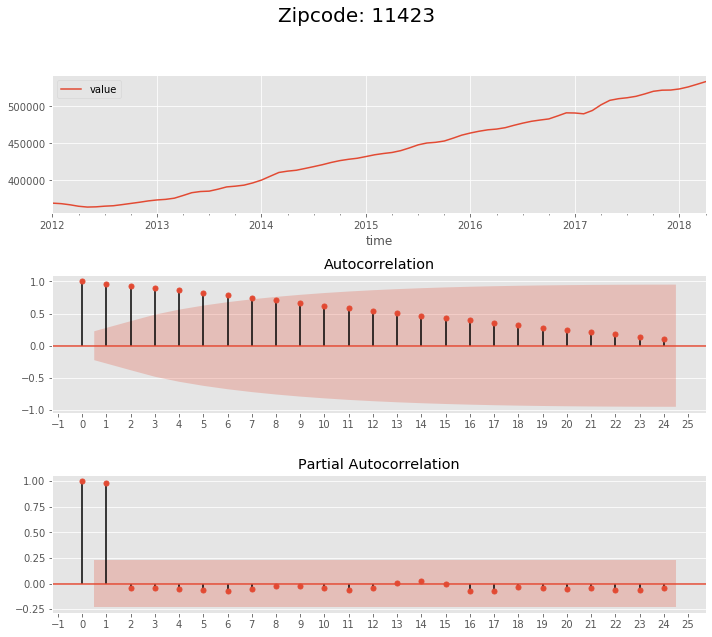

In [42]:
plot_acf_pacf(four_two_three, zipcode = '11423')
plt.show()

### Decompose Time Series

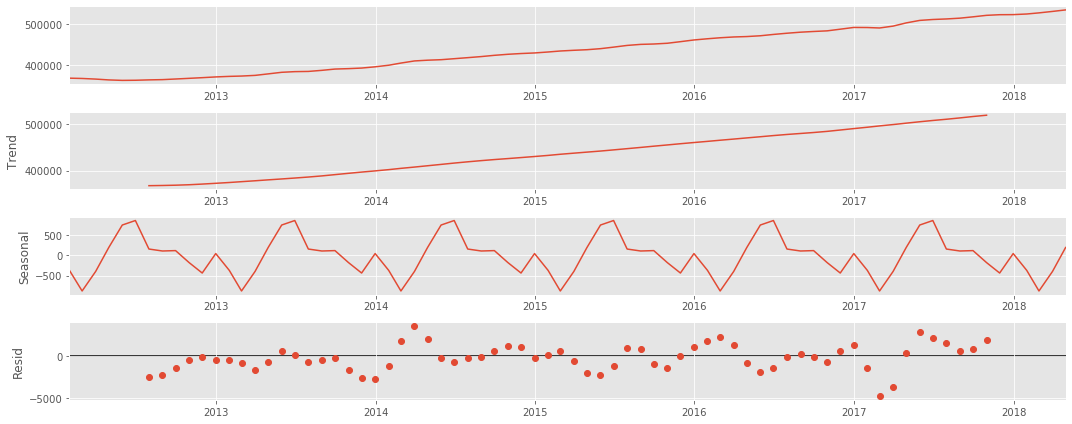

In [43]:
decompose_result = seasonal_decompose(four_two_three, model="additive")

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

decompose_result.plot();

### Fixing Trend: Moving Window Function

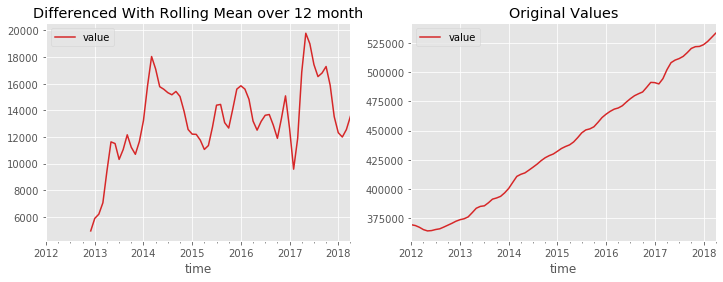

In [44]:
rolling_mean = four_two_three.rolling(window = 12).mean()
four_two_three_rolled_detrended = four_two_three - rolling_mean

ax1 = plt.subplot(121)
four_two_three_rolled_detrended.plot(figsize=(12,4),color="tab:red", title="Differenced With Rolling Mean over 12 month", ax=ax1);
ax2 = plt.subplot(122)
four_two_three.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

### Testing with the Dicky-Fuller Test

In [45]:
dftest = adfuller(four_two_three_rolled_detrended.dropna(), autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -3.002786588351238
2. P-Value :  0.03463498618629319
3. Num Of Lags :  5
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 59
5. Critical Values :
	 1% :  -3.5463945337644063
	 5% :  -2.911939409384601
	 10% :  -2.5936515282964665


In [46]:
four_two_three = four_two_three_rolled_detrended

### SARIMAX Modeling: Parameter Selection

In [47]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [48]:
# Run a grid with pdq and seasonal pdq parameters 
#calculated above and get the best (lowest) AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(four_two_three,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            #print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

### Fitting the Time Series Model - SARIMAX

In [49]:
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])

In [50]:
best_params = dict(ans_df.loc[ans_df['aic'].idxmin()])
best_params

{'pdq': (2, 2, 2), 'pdqs': (2, 2, 2, 12), 'aic': 400.9937704817143}

In [51]:
best_params['pdq']

(2, 2, 2)

In [52]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(four_two_three, 
                                        order= best_params['pdq'], 
                                        seasonal_order=best_params['pdqs'], 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

output.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              value   No. Observations:                   76
Model:             SARIMAX(2, 2, 2)x(2, 2, 2, 12)   Log Likelihood                -191.497
Date:                            Mon, 21 Dec 2020   AIC                            400.994
Time:                                    20:52:01   BIC                            411.213
Sample:                                01-31-2012   HQIC                           403.564
                                     - 04-30-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5003      0.157      3.177      0.001       0.192       0.809
ar.L2         -0.9193      0.120     -7.643      0.000      -1.155      -0.684
ma.L1          1.8735      2.857      0.656      0.512      -3.726       7.473
ma.L2          0.6447      2.206      0.292      0.770      -3.679       4.968
ar.S.L12      -1.5871      0.306     -5.191      0.000      -2.186      -0.988
ar.S.L24      -1.0578      0.140     -7.561      0.000      -1.332      -0.784
ma.S.L12      -0.4366      1.759     -0.248      0.804      -3.883       3.010
ma.S.L24      -0.3164      1.971     -0.161      0.872      -4.179       3.546
sigma2      2.775e+05   9.47e+05      0.293      0.770   -1.58e+06    2.13e+06
===================================================================================
Ljung-Box (Q):                       21.37   Jarque-Bera (JB):                 1.18
Prob(Q):                              0.50   Prob(JB):                         0.55
Heteroskedasticity (H):               1.07   Skew:                            -0.16
Prob(H) (two-sided):                  0.92   Kurtosis:                         1.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Plot Diagnostics

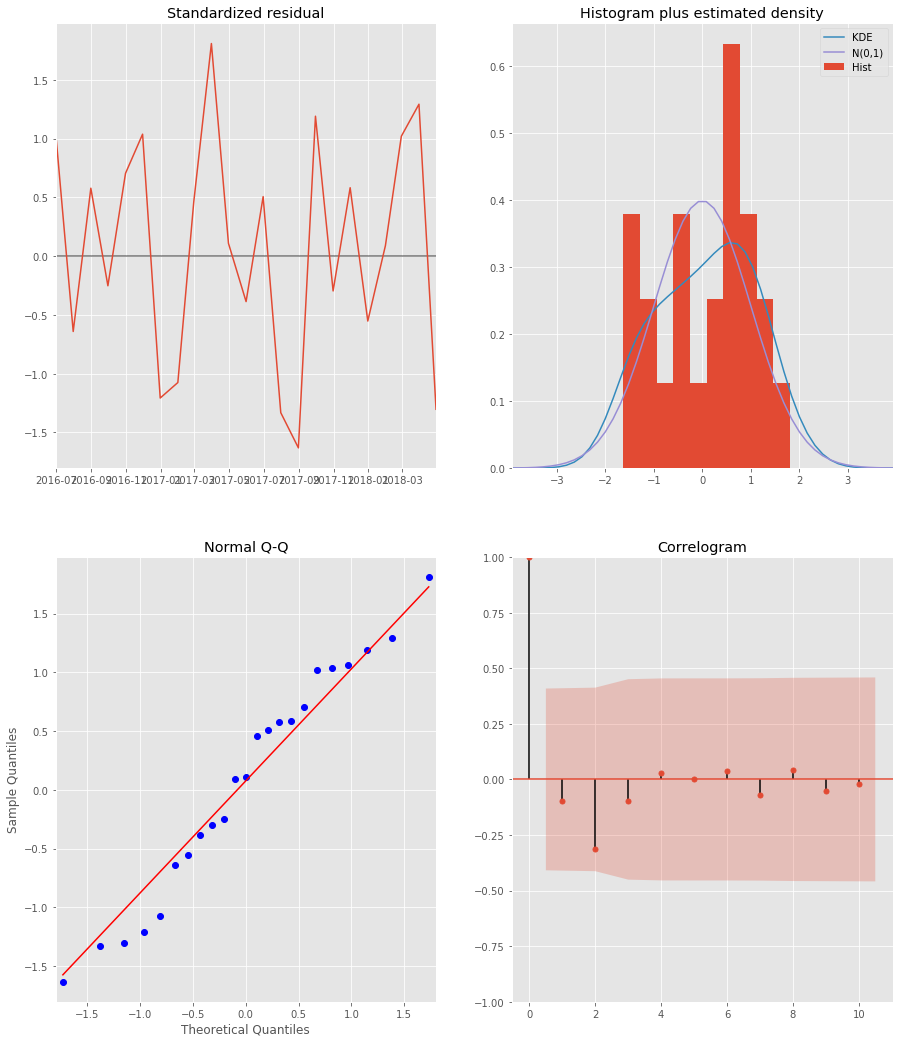

In [53]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

### Model Validation - One Step Ahead Forecasting:

The data can be split 80% and 20% by indicing at 2017-01-31.

In [54]:
four_two_three[60:]

,value
time,
2017-01-31,12633.333333
2017-02-28,9575.000000
2017-03-31,11900.000000
2017-04-30,16866.666667
2017-05-31,19791.666667
2017-06-30,19000.000000
2017-07-31,17441.666667
2017-08-31,16533.333333
2017-09-30,16800.000000


In [55]:
pred = output.get_prediction(start=pd.to_datetime('2017-01-31'), dynamic=False)
pred_conf = pred.conf_int()

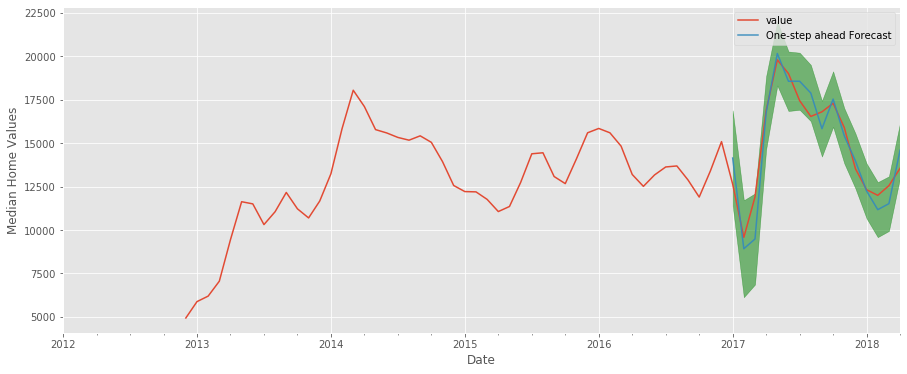

In [56]:

rcParams['figure.figsize'] = 15, 6

ax = four_two_three['2012':].plot(label='observed')

pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

ax.set_xlabel('Date')
ax.set_ylabel('Median Home Values')
plt.legend()

plt.show()

### Accuracy Validation with MSE (Mean Squared Error)

In [57]:
val_forecasted = pred.predicted_mean
val_truth = four_two_three.loc['2017-01-31':].value

mse = ((val_forecasted - val_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1014481.02


### Model Validation - Dynamic Forecasting

In [58]:
pred_dynamic = output.get_prediction(start=pd.to_datetime('2017-01-31'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()


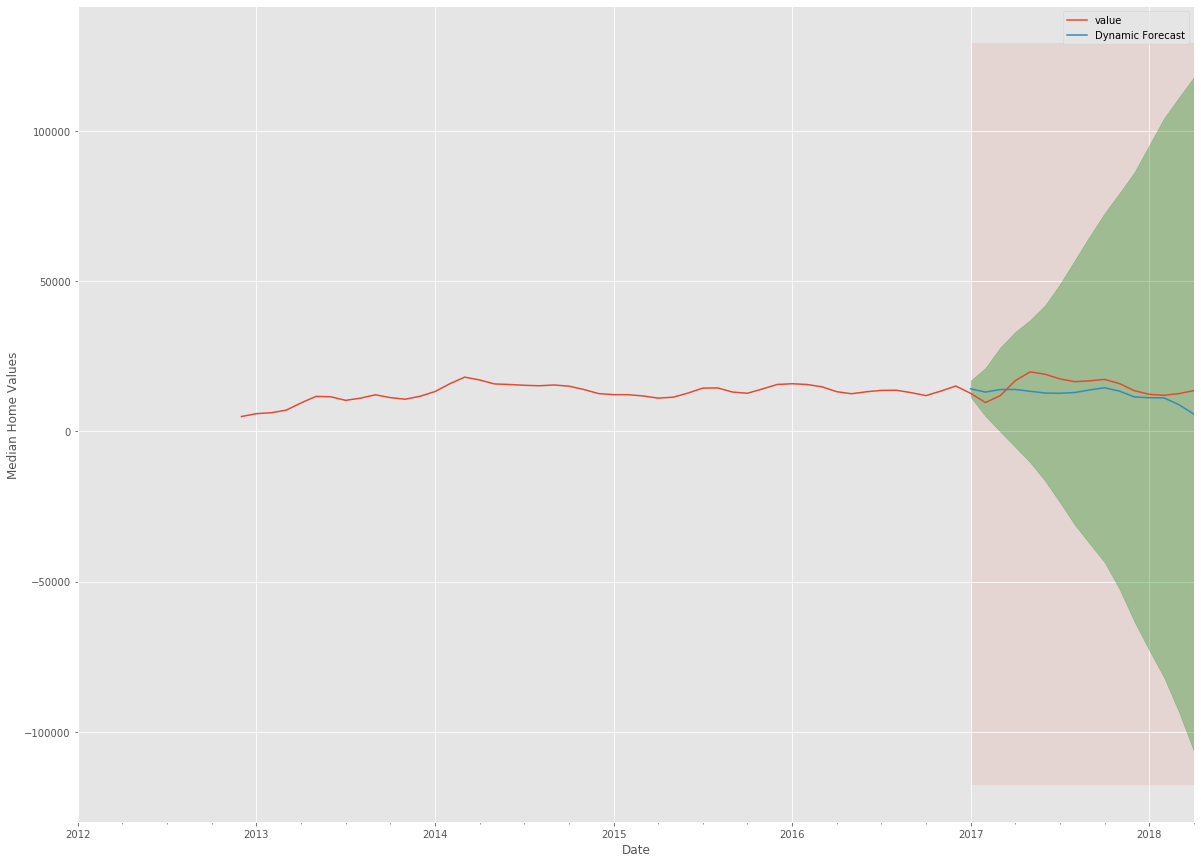

In [59]:
ax = four_two_three['2012':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2017-01-31'), val_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Median Home Values')

plt.legend()
plt.show()


In [60]:
val_forecasted = pred_dynamic.predicted_mean
val_truth = four_two_three.loc['2017-01-31':].value

mse = ((val_forecasted - val_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 15512692.76


### Visualizing Confidence Interval

In [61]:
# Get forecast 24 steps ahead in future
prediction = output.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

pred_conf['mean'] = prediction.predicted_mean

pred_conf.head()

,lower value,upper value,mean
2018-05-31,12312.518043,15449.206396,13880.862220
2018-06-30,8621.733465,20385.501164,14503.617314
2018-07-31,5426.438026,28721.036708,17073.737367
2018-08-31,2674.250458,36527.650922,19600.950690
2018-09-30,-2264.503131,40648.102551,19191.799710


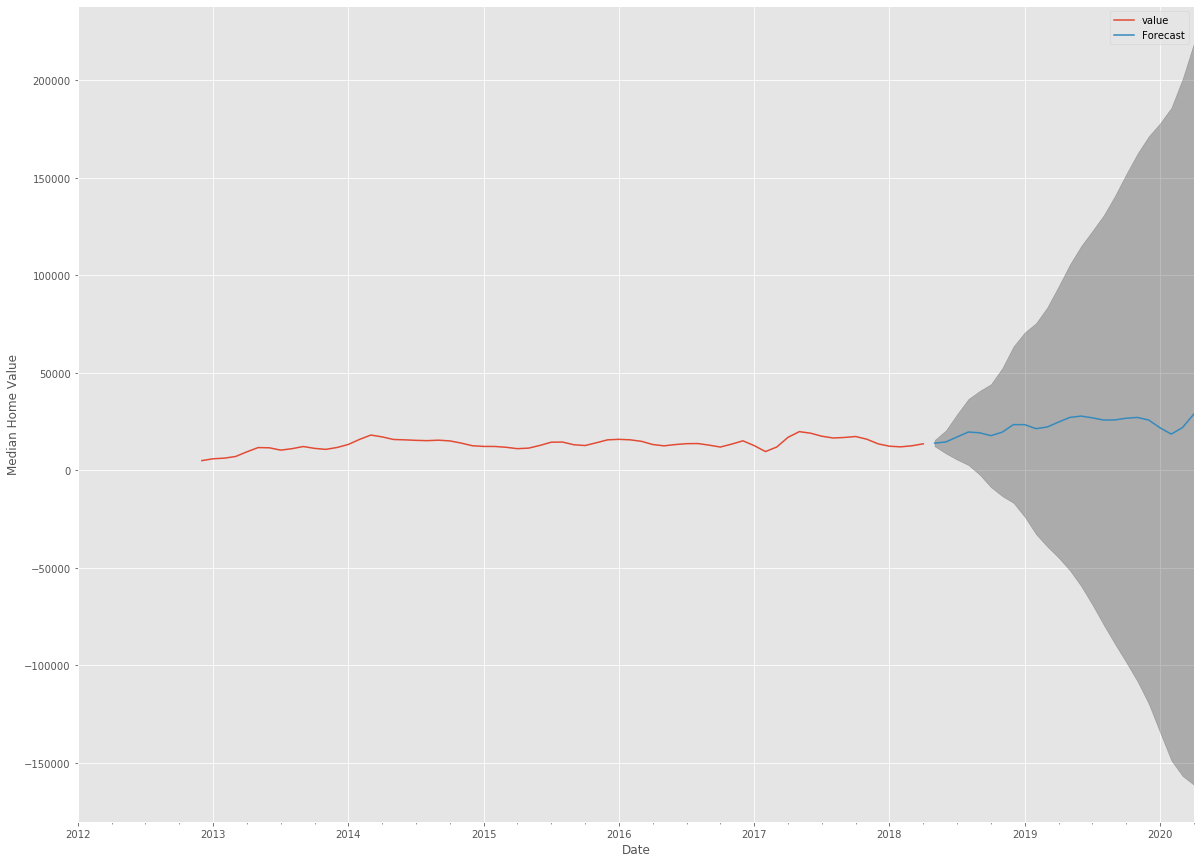

In [62]:
ax = four_two_three.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Median Home Value')

plt.legend()
plt.show()

# Average Return on Investment (ROI) Percentage

The earliest predicted mean represents the value or possible cost of the property at the beginning of the real estate investing initiative. We calculate the percentage of return by subtracting cost from the average predicted values and dividing by the cost. Holding on to a percentage allows for comparison between other zipcodes.

In [63]:
cost = pred_conf.iloc[0]['mean']
roi = (pred_conf - cost)/ cost * 100

roi


,lower value,upper value,mean
2018-05-31,-11.298608,11.298608,0.000000
2018-06-30,-37.887623,46.860482,4.486429
2018-07-31,-60.907054,106.911042,23.001994
2018-08-31,-80.734263,163.151167,41.208452
2018-09-30,-116.313851,192.835574,38.260862
2018-10-31,-162.544914,217.794875,27.624981
2018-11-30,-195.432842,276.584515,40.575836
2018-12-31,-220.439475,357.525417,68.542971
2019-01-31,-272.307273,409.127562,68.410145
2019-02-28,-336.218171,443.295435,53.538632


# Results Dataframe

In [64]:
results.AIC[5] = 400.99
results.Investment_Required[5] = 533400
results.ROI_Percentage[5] = 107.37
results.head()

,Zipcode,AIC,Investment_Required,ROI_Percentage
0,11385,419,657500,211
1,11414,431,669800,24
2,11378,415,696100,-25
3,11421,431,547100,24
4,11418,425,611500,481


# 11369

In [65]:
three_six_nine = queens_grouped.loc[11369]

In [66]:
three_six_nine.tail()

,value
time,
2017-12-31,651600.0
2018-01-31,653700.0
2018-02-28,658600.0
2018-03-31,667300.0
2018-04-30,675700.0


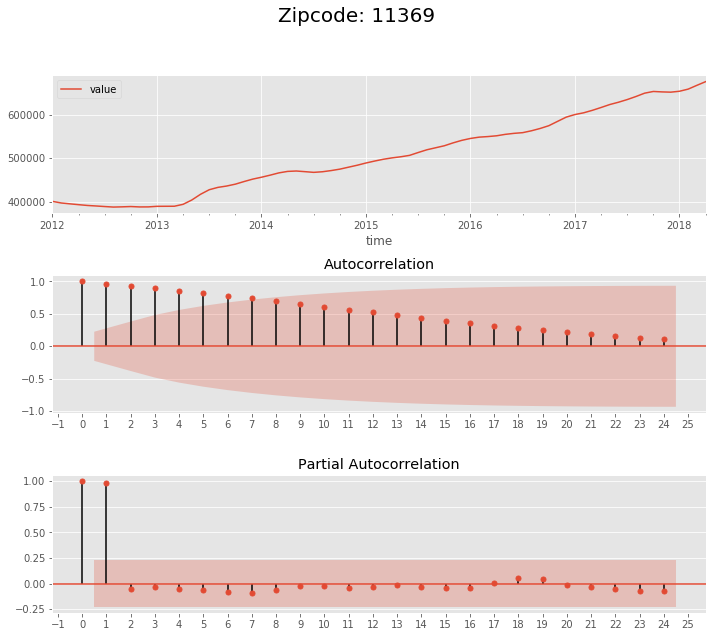

In [69]:
plot_acf_pacf(three_six_nine, zipcode = '11369')
plt.show()

### Decompose Time Series

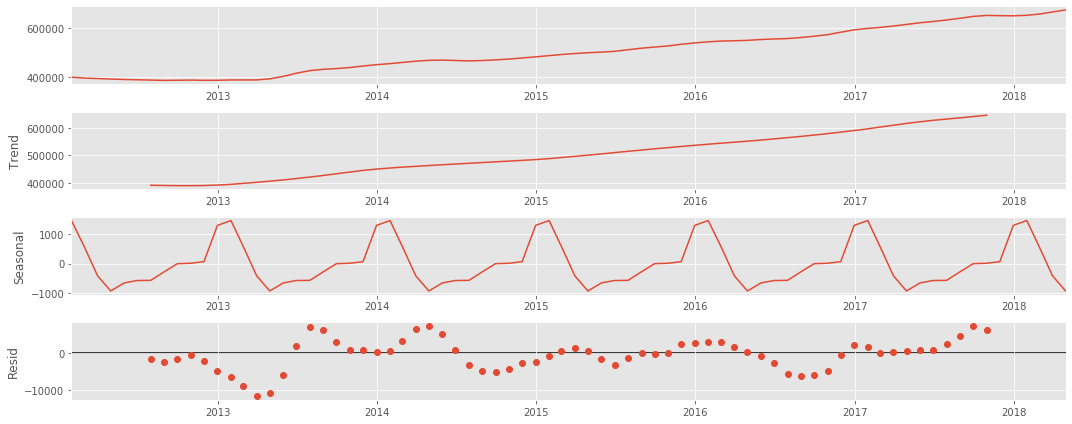

In [71]:
decompose_result = seasonal_decompose(three_six_nine, model="additive")

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

decompose_result.plot();

### Fixing Trend: Moving Window Function

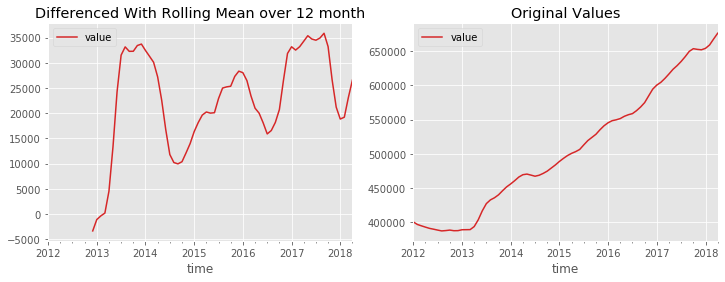

In [72]:
rolling_mean = three_six_nine.rolling(window = 12).mean()
three_six_nine_rolled_detrended = three_six_nine - rolling_mean

ax1 = plt.subplot(121)
three_six_nine_rolled_detrended.plot(figsize=(12,4),color="tab:red", title="Differenced With Rolling Mean over 12 month", ax=ax1);
ax2 = plt.subplot(122)
three_six_nine.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

### Testing with the Dicky-Fuller Test

In [73]:
dftest = adfuller(three_six_nine_rolled_detrended.dropna(), autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -4.7898830678712
2. P-Value :  5.6862050878381585e-05
3. Num Of Lags :  3
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 61
5. Critical Values :
	 1% :  -3.542412746661615
	 5% :  -2.910236235808284
	 10% :  -2.5927445767266866


### Using Differencing with Mean Rolled Time Series for Seasonality

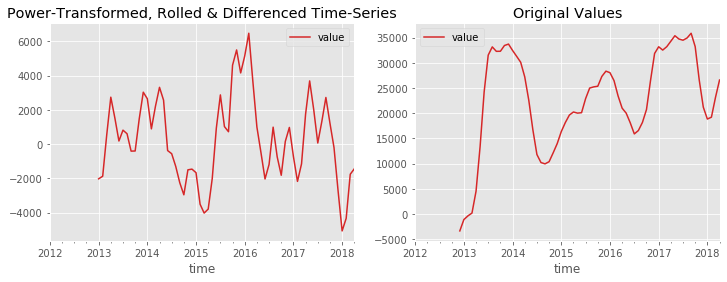

In [74]:
three_six_nine_rolled_detrended_diff = four_one_eight_rolled_detrended - four_one_eight_rolled_detrended.shift()

ax1 = plt.subplot(121)
three_six_nine_rolled_detrended_diff.plot(figsize=(8,4), color="tab:red", title="Power-Transformed, Rolled & Differenced Time-Series", ax=ax1);
ax2 = plt.subplot(122)
three_six_nine_rolled_detrended.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

### Retesting with the Dicky-Fuller Test

In [75]:
dftest = adfuller(three_six_nine_rolled_detrended_diff.dropna().values, autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -3.637037316183663
2. P-Value :  0.005091177691274142
3. Num Of Lags :  8
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 55
5. Critical Values :
	 1% :  -3.5552728880540942
	 5% :  -2.9157312396694217
	 10% :  -2.5956695041322315


In [76]:
three_six_nine = three_six_nine_rolled_detrended_diff

### SARIMAX Modeling: Parameter Selection

In [77]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [79]:
# Run a grid with pdq and seasonal pdq parameters 
#calculated above and get the best (lowest) AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(three_six_nine,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            #print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

### Fitting the Time Series Model - SARIMAX

In [80]:
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])

In [81]:
best_params = dict(ans_df.loc[ans_df['aic'].idxmin()])
best_params

{'pdq': (2, 2, 2), 'pdqs': (0, 2, 2, 12), 'aic': 425.13043389895006}

In [82]:
best_params['pdq']

(2, 2, 2)

In [83]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(three_six_nine, 
                                        order= best_params['pdq'], 
                                        seasonal_order=best_params['pdqs'], 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

output.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              value   No. Observations:                   76
Model:             SARIMAX(2, 2, 2)x(0, 2, 2, 12)   Log Likelihood                -205.565
Date:                            Mon, 21 Dec 2020   AIC                            425.130
Time:                                    21:07:15   BIC                            433.079
Sample:                                01-31-2012   HQIC                           427.129
                                     - 04-30-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1441      0.365      0.395      0.693      -0.572       0.860
ar.L2         -0.5202      0.400     -1.301      0.193      -1.304       0.264
ma.L1         -0.4349      1.372     -0.317      0.751      -3.124       2.254
ma.L2         -0.5653      0.932     -0.607      0.544      -2.392       1.261
ma.S.L12      -2.4251      1.088     -2.230      0.026      -4.557      -0.293
ma.S.L24       1.6436      2.040      0.806      0.420      -2.355       5.642
sigma2      1.175e+06   1.37e-06   8.59e+11      0.000    1.17e+06    1.17e+06
===================================================================================
Ljung-Box (Q):                       16.95   Jarque-Bera (JB):                 0.49
Prob(Q):                              0.77   Prob(JB):                         0.78
Heteroskedasticity (H):               0.96   Skew:                            -0.15
Prob(H) (two-sided):                  0.96   Kurtosis:                         2.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.54e+29. Standard errors may be unstable.
"""

### Plot Diagnostics

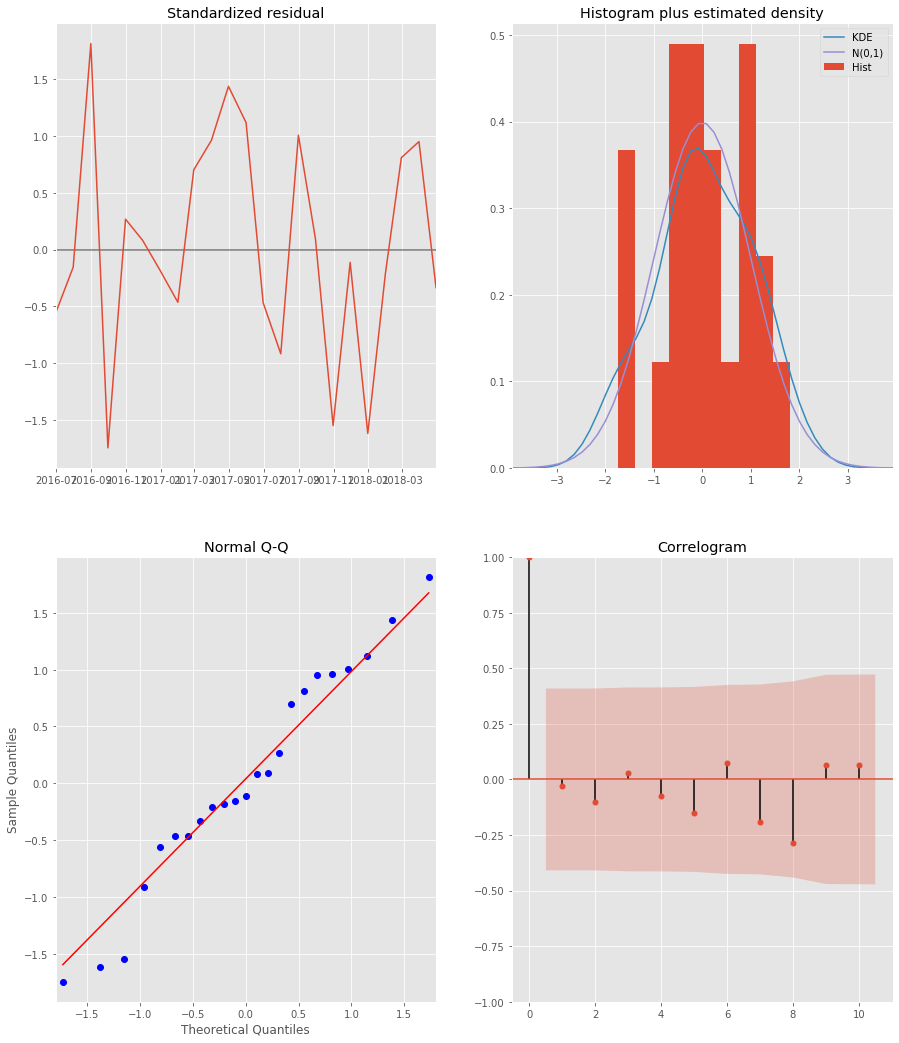

In [84]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

### Model Validation - One Step Ahead Forecasting:

The data can be split 80% and 20% by indicing at 2017-01-31.

In [85]:
three_six_nine[60:]

,value
time,
2017-01-31,-725.000000
2017-02-28,-2175.000000
2017-03-31,-1150.000000
2017-04-30,1758.333333
2017-05-31,3691.666667
2017-06-30,2016.666667
2017-07-31,66.666667
2017-08-31,1325.000000
2017-09-30,2725.000000


In [86]:
pred = output.get_prediction(start=pd.to_datetime('2017-01-31'), dynamic=False)
pred_conf = pred.conf_int()

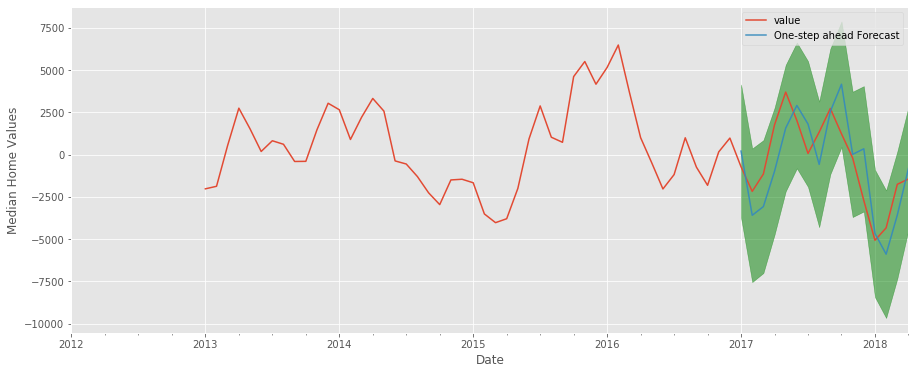

In [87]:

rcParams['figure.figsize'] = 15, 6

ax = three_six_nine['2012':].plot(label='observed')

pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

ax.set_xlabel('Date')
ax.set_ylabel('Median Home Values')
plt.legend()

plt.show()

### Accuracy Validation with MSE (Mean Squared Error)

In [88]:
val_forecasted = pred.predicted_mean
val_truth = three_six_nine.loc['2017-01-31':].value

mse = ((val_forecasted - val_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 3149082.19


### Model Validation - Dynamic Forecasting

In [89]:
pred_dynamic = output.get_prediction(start=pd.to_datetime('2017-01-31'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()


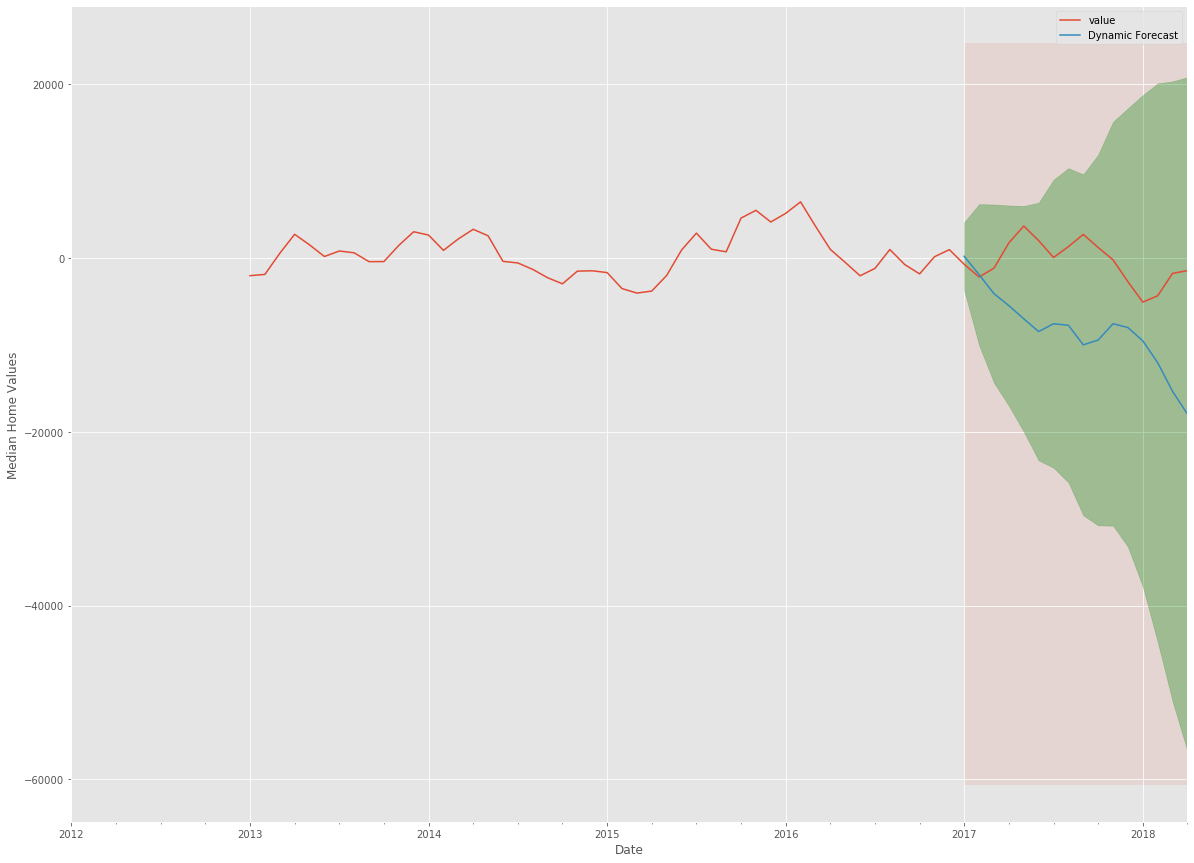

In [90]:
ax = three_six_nine['2012':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2017-01-31'), val_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Median Home Values')

plt.legend()
plt.show()


In [91]:
val_forecasted = pred_dynamic.predicted_mean
val_truth = three_six_nine.loc['2017-01-31':].value

mse = ((val_forecasted - val_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 82448253.32


### Visualizing Confidence Interval

In [92]:
# Get forecast 24 steps ahead in future
prediction = output.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

pred_conf['mean'] = prediction.predicted_mean

pred_conf.head()

,lower value,upper value,mean
2018-05-31,-6982.097399,254.350150,-3363.873625
2018-06-30,-12228.239966,2484.868088,-4871.685939
2018-07-31,-13052.738119,5256.660992,-3898.038563
2018-08-31,-13287.878573,6931.241492,-3178.318541
2018-09-30,-16090.822663,6435.307528,-4827.757567


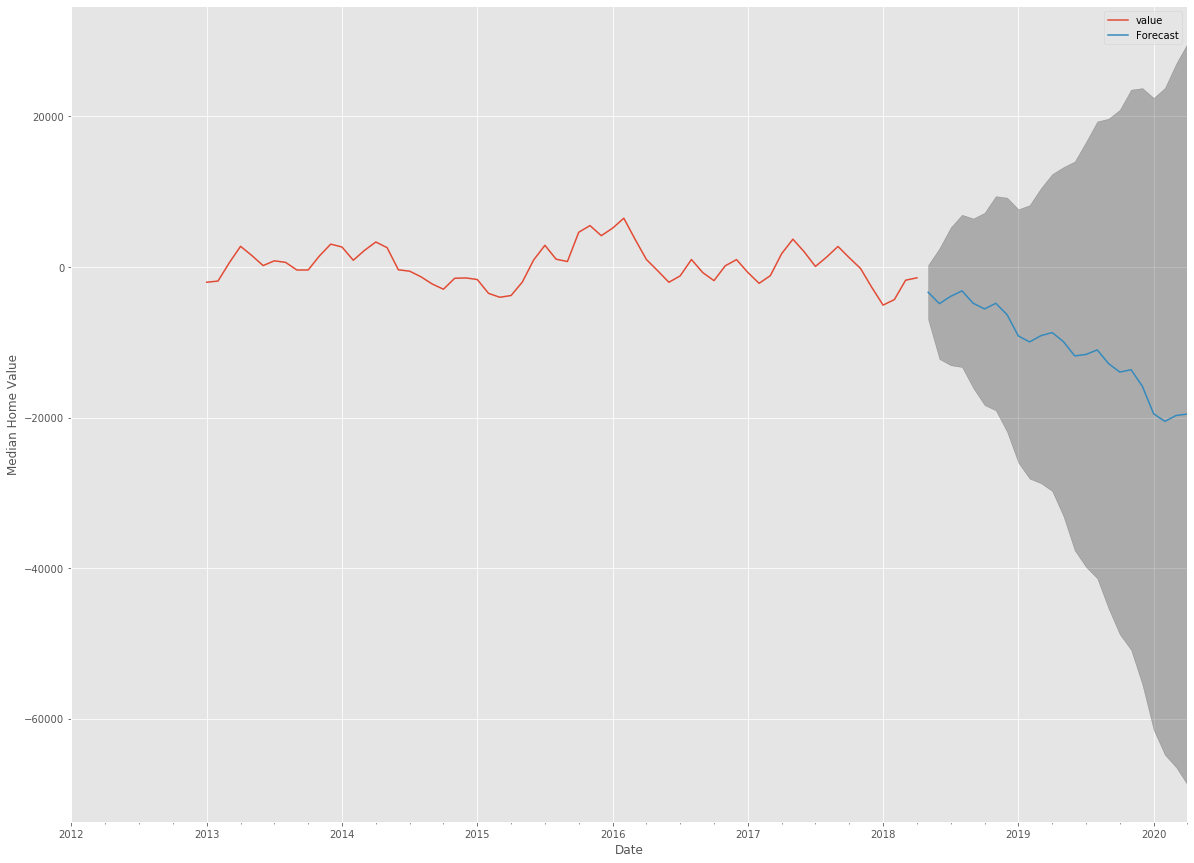

In [93]:
ax = three_six_nine.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Median Home Value')

plt.legend()
plt.show()

# Average Return on Investment (ROI) Percentage

The earliest predicted mean represents the value or possible cost of the property at the beginning of the real estate investing initiative. We calculate the percentage of return by subtracting cost from the average predicted values and dividing by the cost. Holding on to a percentage allows for comparison between other zipcodes.

In [94]:
cost = pred_conf.iloc[0]['mean']
roi = (pred_conf - cost)/ cost * 100

roi


,lower value,upper value,mean
2018-05-31,107.561228,-107.561228,-0.000000
2018-06-30,263.516628,-173.869246,44.823691
2018-07-31,288.027006,-256.268088,15.879459
2018-08-31,295.017175,-306.049402,-5.516113
2018-09-30,378.342068,-291.306459,43.517804
2018-10-31,445.161147,-313.934737,65.613205
2018-11-30,466.493374,-379.561651,43.465861
2018-12-31,550.855118,-373.724559,88.565279
2019-01-31,672.842353,-327.813649,172.514352
2019-02-28,735.891572,-343.929525,195.981023


# Results Dataframe

In [98]:
results.AIC[6] = 425.13
results.Investment_Required[6] = 675700
results.ROI_Percentage[6] = 481.04
results.head(10)

,Zipcode,AIC,Investment_Required,ROI_Percentage
0,11385,419,657500,211
1,11414,431,669800,24
2,11378,415,696100,-25
3,11421,431,547100,24
4,11418,425,611500,481
5,11423,400,533400,107
6,11369,425,675700,481
7,11417,1,1,1
8,11427,1,1,1
9,11426,1,1,1


# 11417

In [99]:
four_one_seven = queens_grouped.loc[11417]

In [100]:
four_one_seven.tail()

,value
time,
2017-12-31,494500.0
2018-01-31,499400.0
2018-02-28,503500.0
2018-03-31,507100.0
2018-04-30,510000.0


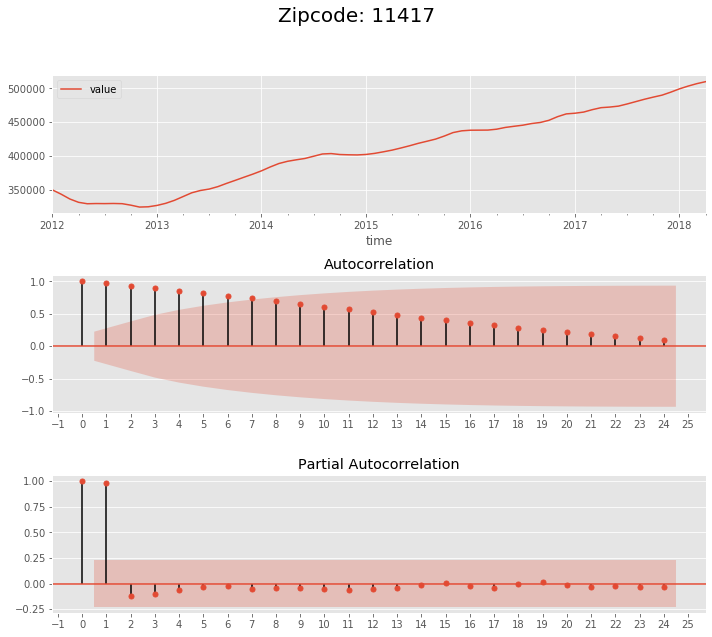

In [101]:
plot_acf_pacf(four_one_seven, zipcode = '11417')
plt.show()

### Decompose Time Series

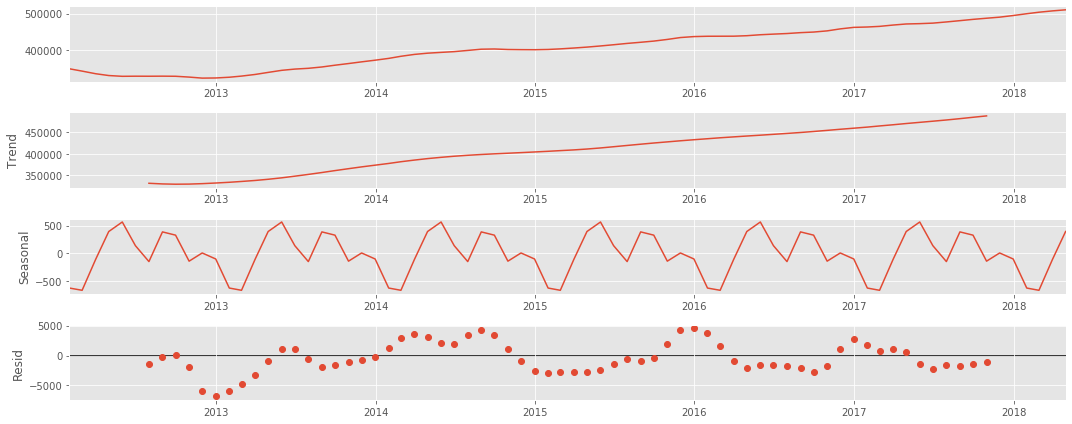

In [102]:
decompose_result = seasonal_decompose(four_one_seven, model="additive")

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

decompose_result.plot();

### Fixing Trend: Moving Window Function

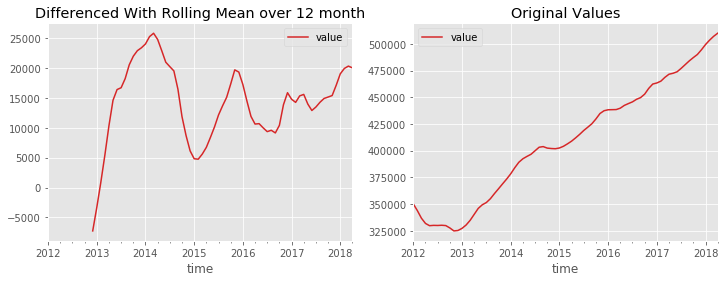

In [103]:
rolling_mean = four_one_seven.rolling(window = 12).mean()
four_one_seven_rolled_detrended = four_one_seven - rolling_mean

ax1 = plt.subplot(121)
four_one_seven_rolled_detrended.plot(figsize=(12,4),color="tab:red", title="Differenced With Rolling Mean over 12 month", ax=ax1);
ax2 = plt.subplot(122)
four_one_seven.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

### Testing with the Dicky-Fuller Test

In [104]:
dftest = adfuller(four_one_seven_rolled_detrended.dropna(), autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -3.9547904223213504
2. P-Value :  0.0016666490900708122
3. Num Of Lags :  3
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 61
5. Critical Values :
	 1% :  -3.542412746661615
	 5% :  -2.910236235808284
	 10% :  -2.5927445767266866


In [105]:
four_one_seven = four_one_seven_rolled_detrended

### SARIMAX Modeling: Parameter Selection

In [107]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [108]:
# Run a grid with pdq and seasonal pdq parameters 
#calculated above and get the best (lowest) AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(four_one_seven,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            #print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

### Fitting the Time Series Model - SARIMAX

In [109]:
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])

In [110]:
best_params = dict(ans_df.loc[ans_df['aic'].idxmin()])
best_params

{'pdq': (2, 2, 2), 'pdqs': (0, 2, 2, 12), 'aic': 406.3949985760851}

In [111]:
best_params['pdq']

(2, 2, 2)

In [112]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(four_one_seven, 
                                        order= best_params['pdq'], 
                                        seasonal_order=best_params['pdqs'], 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

output.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              value   No. Observations:                   76
Model:             SARIMAX(2, 2, 2)x(0, 2, 2, 12)   Log Likelihood                -196.197
Date:                            Mon, 21 Dec 2020   AIC                            406.395
Time:                                    21:21:18   BIC                            414.343
Sample:                                01-31-2012   HQIC                           408.394
                                     - 04-30-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5864      0.309     -1.901      0.057      -1.191       0.018
ar.L2         -0.4784      0.349     -1.373      0.170      -1.162       0.205
ma.L1          1.6001      0.365      4.388      0.000       0.885       2.315
ma.L2          1.0381      0.599      1.734      0.083      -0.135       2.211
ma.S.L12      -2.2641      1.077     -2.103      0.035      -4.374      -0.154
ma.S.L24       1.5192      1.207      1.259      0.208      -0.846       3.885
sigma2      5.237e+05    7.3e+05      0.718      0.473   -9.07e+05    1.95e+06
===================================================================================
Ljung-Box (Q):                       12.52   Jarque-Bera (JB):                 0.53
Prob(Q):                              0.95   Prob(JB):                         0.77
Heteroskedasticity (H):               0.96   Skew:                            -0.37
Prob(H) (two-sided):                  0.95   Kurtosis:                         3.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Plot Diagnostics

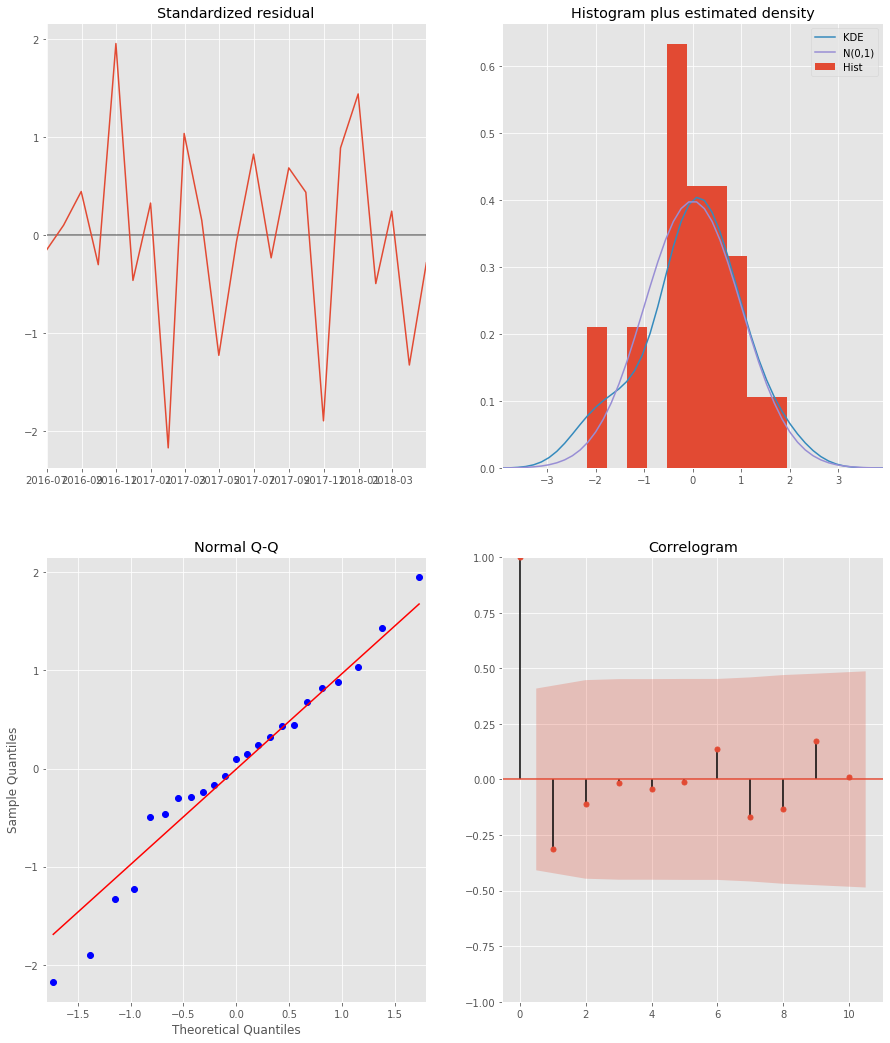

In [113]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

### Model Validation - One Step Ahead Forecasting:

The data can be split 80% and 20% by indicing at 2017-01-31.

In [114]:
four_one_seven[60:]

,value
time,
2017-01-31,14758.333333
2017-02-28,14233.333333
2017-03-31,15316.666667
2017-04-30,15566.666667
2017-05-31,13958.333333
2017-06-30,12875.000000
2017-07-31,13458.333333
2017-08-31,14250.000000
2017-09-30,14883.333333


In [115]:
pred = output.get_prediction(start=pd.to_datetime('2017-01-31'), dynamic=False)
pred_conf = pred.conf_int()

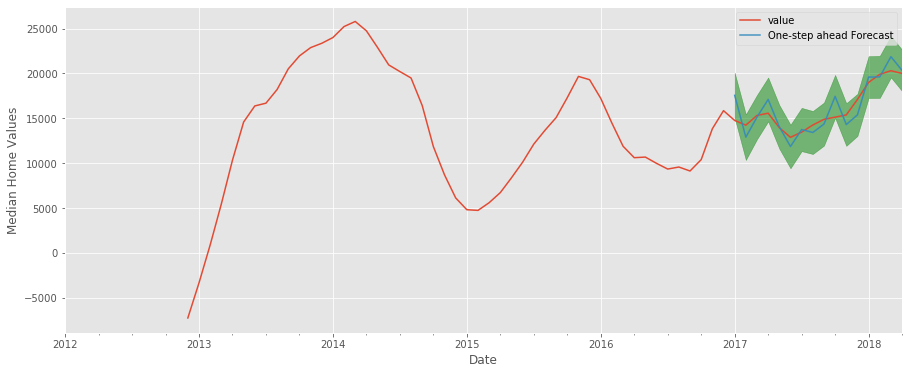

In [116]:

rcParams['figure.figsize'] = 15, 6

ax = four_one_seven['2012':].plot(label='observed')

pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

ax.set_xlabel('Date')
ax.set_ylabel('Median Home Values')
plt.legend()

plt.show()

### Accuracy Validation with MSE (Mean Squared Error)

In [117]:
val_forecasted = pred.predicted_mean
val_truth = four_one_seven.loc['2017-01-31':].value

mse = ((val_forecasted - val_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1662834.17


### Model Validation - Dynamic Forecasting

In [118]:
pred_dynamic = output.get_prediction(start=pd.to_datetime('2017-01-31'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()


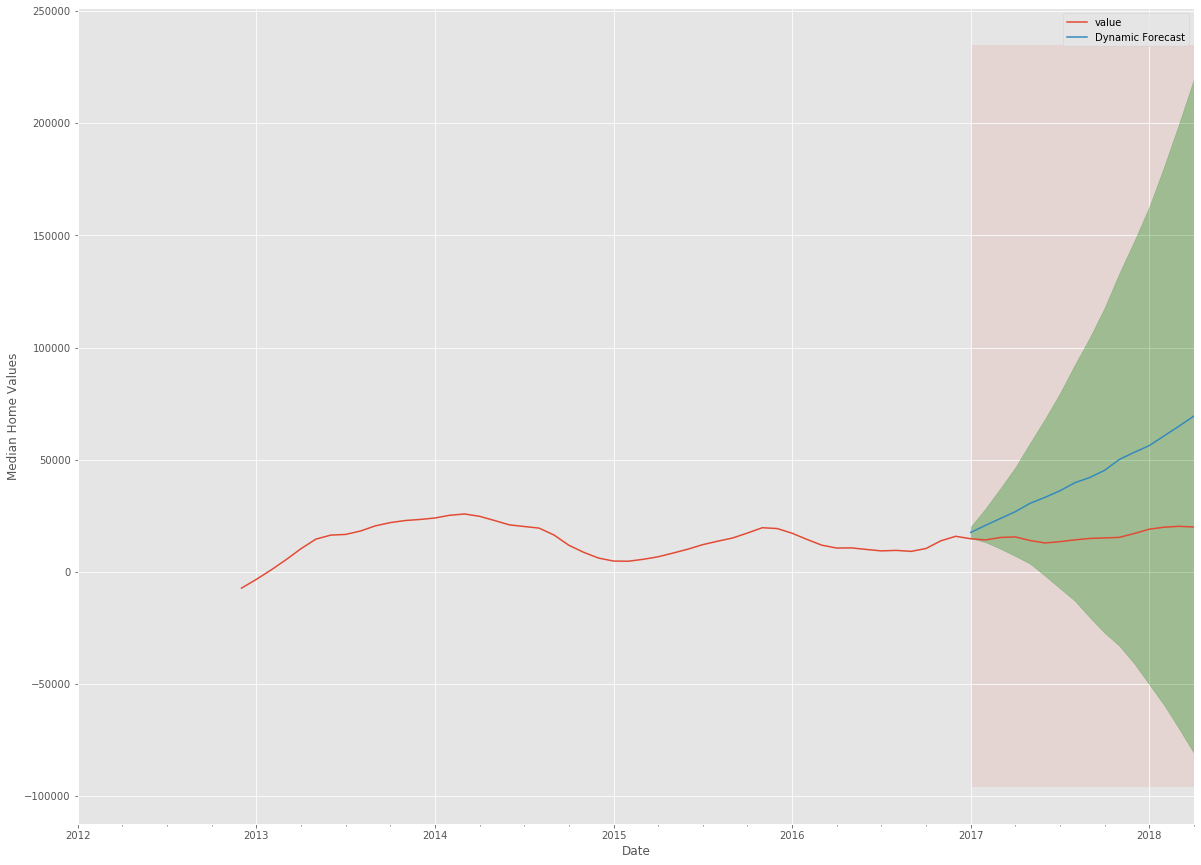

In [119]:
ax = four_one_seven['2012':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2017-01-31'), val_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Median Home Values')

plt.legend()
plt.show()


In [120]:
val_forecasted = pred_dynamic.predicted_mean
val_truth = four_one_seven.loc['2017-01-31':].value

mse = ((val_forecasted - val_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 858826199.49


### Visualizing Confidence Interval

In [121]:
# Get forecast 24 steps ahead in future
prediction = output.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

pred_conf['mean'] = prediction.predicted_mean

pred_conf.head()

,lower value,upper value,mean
2018-05-31,15919.256698,20522.591509,18220.924103
2018-06-30,9734.379795,23766.970318,16750.675057
2018-07-31,3680.545084,29218.115692,16449.330388
2018-08-31,-2764.230287,34904.760233,16070.264973
2018-09-30,-10725.995292,40982.306175,15128.155441


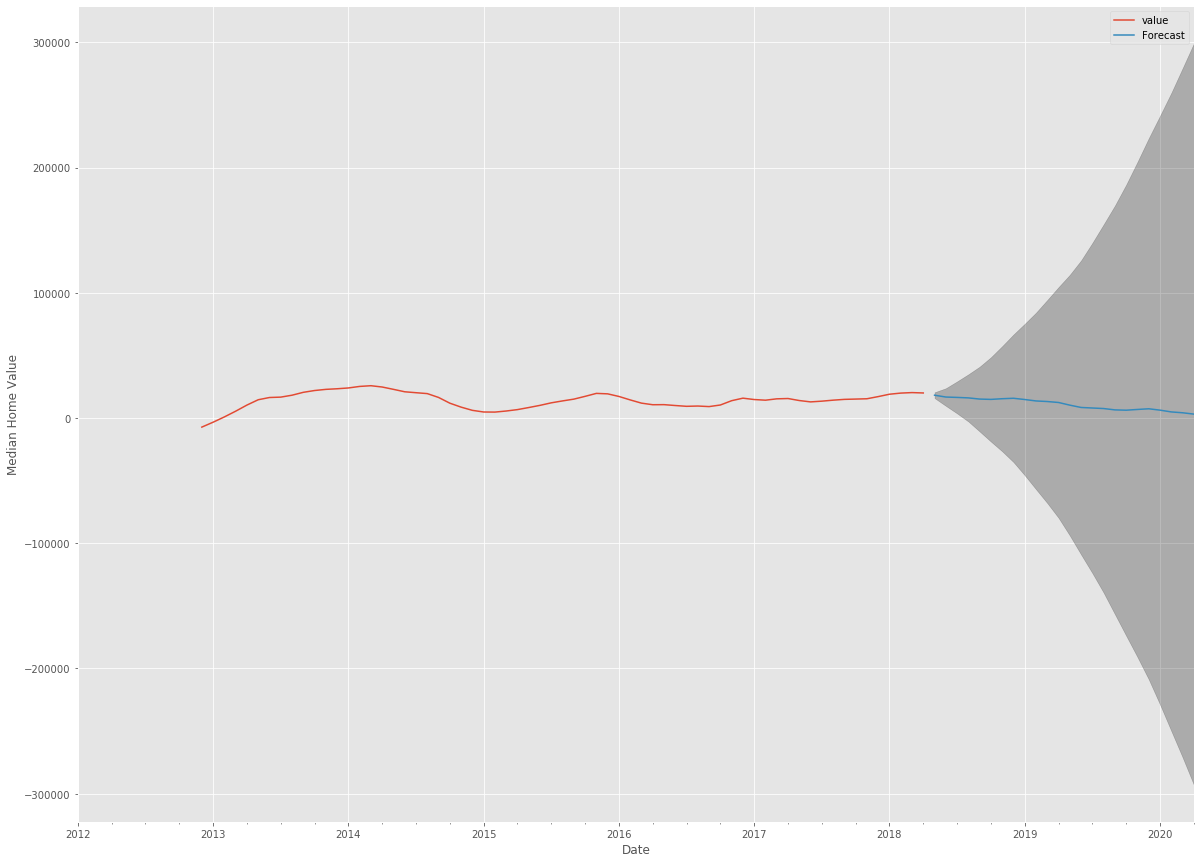

In [122]:
ax = four_one_seven.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Median Home Value')

plt.legend()
plt.show()

# Average Return on Investment (ROI) Percentage

The earliest predicted mean represents the value or possible cost of the property at the beginning of the real estate investing initiative. We calculate the percentage of return by subtracting cost from the average predicted values and dividing by the cost. Holding on to a percentage allows for comparison between other zipcodes.

In [123]:
cost = pred_conf.iloc[0]['mean']
roi = (pred_conf - cost)/ cost * 100

roi


,lower value,upper value,mean
2018-05-31,-12.632001,12.632001,0.000000
2018-06-30,-46.575817,30.437788,-8.069015
2018-07-31,-79.800448,60.354741,-9.722853
2018-08-31,-115.170637,91.564160,-11.803239
2018-09-30,-158.866363,124.918923,-16.973720
2018-10-31,-203.181536,166.392438,-18.394549
2018-11-30,-245.887315,215.020748,-15.433283
2018-12-31,-293.018755,266.056857,-13.480949
2019-01-31,-350.784878,312.953789,-18.915545
2019-02-28,-412.152797,361.744371,-25.204213


# Results Dataframe

In [125]:
results.AIC[7] = 406.39
results.Investment_Required[7] = 510000
results.ROI_Percentage[7] = -82.83
results.head(10)

,Zipcode,AIC,Investment_Required,ROI_Percentage
0,11385,419,657500,211
1,11414,431,669800,24
2,11378,415,696100,-25
3,11421,431,547100,24
4,11418,425,611500,481
5,11423,400,533400,107
6,11369,425,675700,481
7,11417,406,510000,-82
8,11427,1,1,1
9,11426,1,1,1


# Pickling results Dataframe

In [126]:
results.to_pickle("./new_results.pkl")